# Blinkit Sales: Exploratory Data Analysis with Python

In [3]:
# importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### File 1: Blinkit Products

In [5]:
# loading csv into a dataframe
product_df = pd.read_csv('/Users/tovi/Documents/blinkit_products.csv')
product_df

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55
...,...,...,...,...,...,...,...,...,...,...
263,444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71
264,679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
265,240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94


In [8]:
#checking the shape of df
product_df.shape

(268, 10)

In [10]:
# general descriptive stats
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


#### Data Cleaning

In [13]:
# checking for duplicates
product_df.duplicated().sum()

0

In [15]:
# checking for null values
null_check = product_df.isnull().sum()
print(null_check)

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64


In [17]:
# creating new column that converts prices from the Indian Rupee to the US Dollar
exchange_rate = 0.012
product_df['price_usd'] = product_df['price'] * exchange_rate
product_df.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,price_usd
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,11.37540
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,1.52592
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,2.54568
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,2.51508
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,4.25424


#### Pricing & Margins

In [20]:
# calculating average price and margin percentage
product_df[['price', 'margin_percentage']].mean()

price                488.356828
margin_percentage     27.779851
dtype: float64

In [22]:
# calculating average price and margin percentage
product_df[['price_usd', 'margin_percentage']].mean()

price_usd             5.860282
margin_percentage    27.779851
dtype: float64

In [24]:
# calcultaing margin percentage variation across categories
product_df.groupby('category')['margin_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Baby Care,16.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
Cold Drinks & Juices,22.0,30.0,0.0,30.0,30.0,30.0,30.0,30.0
Dairy & Breakfast,30.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0
Fruits & Vegetables,27.0,25.0,0.0,25.0,25.0,25.0,25.0,25.0
Grocery & Staples,24.0,15.0,0.0,15.0,15.0,15.0,15.0,15.0
Household Care,27.0,25.0,0.0,25.0,25.0,25.0,25.0,25.0
Instant & Frozen Food,20.0,40.0,0.0,40.0,40.0,40.0,40.0,40.0
Personal Care,25.0,35.0,0.0,35.0,35.0,35.0,35.0,35.0
Pet Care,25.0,35.0,0.0,35.0,35.0,35.0,35.0,35.0


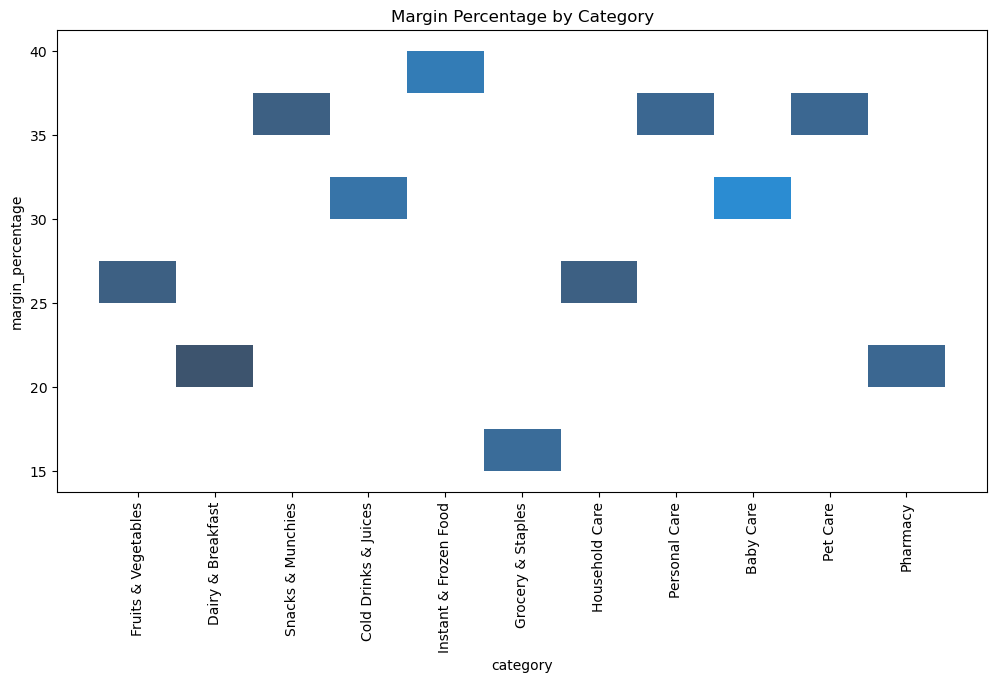

In [26]:
# margin percentage distribution across categories visual
plt.figure(figsize=(12,6))
sns.histplot(data=product_df, x='category', y='margin_percentage')
plt.xticks(rotation=90)
plt.title("Margin Percentage by Category")
plt.show()


In [28]:
# average price of products in each category (USD)
product_df.groupby('category')['price_usd'].mean()

category
Baby Care                6.193830
Cold Drinks & Juices     6.006180
Dairy & Breakfast        6.829156
Fruits & Vegetables      6.558422
Grocery & Staples        4.768290
Household Care           4.838333
Instant & Frozen Food    5.044140
Personal Care            5.299147
Pet Care                 6.563208
Pharmacy                 7.188322
Snacks & Munchies        5.005280
Name: price_usd, dtype: float64

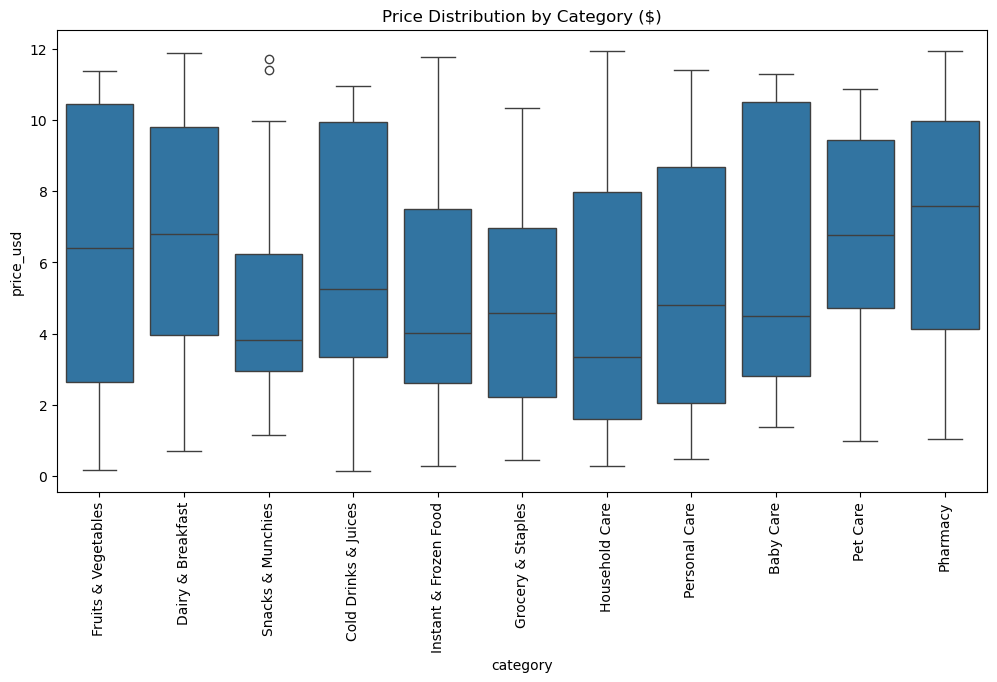

In [30]:
# price distribution across categories visual (USD)
plt.figure(figsize=(12,6))
sns.boxplot(data=product_df, x='category', y='price_usd')
plt.xticks(rotation=90)
plt.title("Price Distribution by Category ($)")
plt.show()


In [32]:
# products with highest and lowest markup, mrp is in Rupees here, so I will use the non-converted prices to calculate markup
product_df['markup'] = product_df['mrp'] - product_df['price']
highest_markup = product_df.loc[product_df['markup'].idxmax()]
lowest_markup = product_df.loc[product_df['markup'].idxmin()]
print(f'The product with the highest markup is: {highest_markup}')
print(f'The product with the lowest markup is: {lowest_markup}')

The product with the highest markup is: product_id                          305754
product_name             Frozen Vegetables
category             Instant & Frozen Food
brand                         Mammen-Hegde
price                               979.99
mrp                                1633.32
margin_percentage                     40.0
shelf_life_days                        180
min_stock_level                         22
max_stock_level                         81
price_usd                         11.75988
markup                              653.33
Name: 110, dtype: object
The product with the lowest markup is: product_id                        654297
product_name                    Potatoes
category             Fruits & Vegetables
brand                      Chandran-Dass
price                              13.25
mrp                                17.67
margin_percentage                   25.0
shelf_life_days                        3
min_stock_level                       20
max_stock_l

#### Stock & Inventory

In [35]:
# category with the most products
max_prod = product_df['category'].value_counts().idxmax()
print (f'The category with the most amount of products is {max_prod}.')

The category with the most amount of products is Dairy & Breakfast.


In [37]:
# category with the least products
min_prod = product_df['category'].value_counts().idxmin()
print (f'The category with the least amount of products is {min_prod}.')

The category with the least amount of products is Baby Care.


### File 2: Blinkit Deliveries

In [40]:
# loading csv into a dataframe
delivery_df = pd.read_csv('/Users/tovi/Documents/blinkit_orders.csv')
delivery_df

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741
...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,On Time,1132.33,Cash,90914,1587
4996,8340761903,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,On Time,2372.01,Cash,27952,3458
4997,5936301790,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,On Time,3158.35,Cash,9590,7424
4998,5710579377,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,On Time,1918.92,UPI,29940,6128


In [42]:
#checking shape
delivery_df.shape

(5000, 10)

In [44]:
# general descriptive stats
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


#### Data Cleaning

In [47]:
# checking for duplicates
delivery_df.duplicated().sum()

0

In [49]:
# checking for null values
null_check = delivery_df.isnull().sum()
print(null_check)

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64


In [51]:
# converting delivery times to datetime format
delivery_df['order_date'] = pd.to_datetime(delivery_df['order_date'])
delivery_df['promised_delivery_time'] = pd.to_datetime(delivery_df['promised_delivery_time'])
delivery_df['actual_delivery_time'] = pd.to_datetime(delivery_df['actual_delivery_time'])

# creating column of delivery delay times and calculating delays in minutes
delivery_df['delivery_delay'] = (delivery_df['actual_delivery_time'] - delivery_df['promised_delivery_time']).dt.total_seconds() / 60

delivery_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,delivery_delay
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,-5.0
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2.0
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,4.0
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,-1.0
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,1.0


In [53]:
# creating new column that converts order_total from Rupees to USD
delivery_df['order_total_usd'] = delivery_df['order_total'] * exchange_rate
delivery_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,delivery_delay,order_total_usd
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,-5.0,38.36484
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2.0,11.71860
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,4.0,10.06860
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,-1.0,5.28276
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,1.0,30.32016


#### Delivery Times & Delays

In [56]:
# calculating how often are deliveries late
was_late=[]

lateDeliv=(delivery_df['delivery_delay'] > 0)

for i in lateDeliv:
    if i is True:
        was_late.append(i)

late_delivery_rate= (was_late.count(True) / delivery_df['delivery_delay'].count()) * 100
print (f'Deliveries are late {late_delivery_rate:.2f}% of the time.')

Deliveries are late 61.96% of the time.


In [58]:
# METHOD 2
late_deliveries = (delivery_df['delivery_delay'] > 0).mean() * 100
print(f"Late deliveries: {late_deliveries:.2f}%")

Late deliveries: 61.96%


In [60]:
# calculating average delivery time for all orders
average_delivery_time = delivery_df['delivery_delay'].mean()
print(f"Average delivery time for all orders: {average_delivery_time:.2f} minutes")

Average delivery time for all orders: 4.44 minutes


In [62]:
# calculating average delivery time for on-time orders
on_time_deliveries = delivery_df[delivery_df['delivery_delay'] <= 0]
avg_on_time = on_time_deliveries['delivery_delay'].mean()

#convert negative value to positive value (numbers less than 0 represent early deliveries in the delivery_delay column)
avg_on_time = avg_on_time * -1
print(f"The average delivery time for on-time orders is: {avg_on_time:.2f} minutes")

The average delivery time for on-time orders is: 2.47 minutes


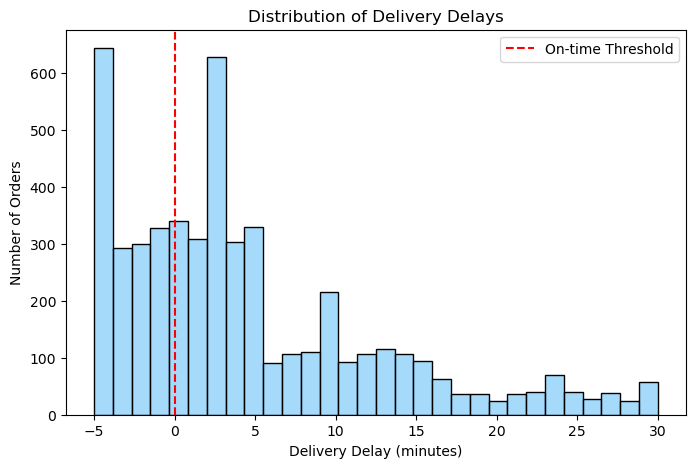

In [64]:
# creating visual of delivery time distribution
plt.figure(figsize=(8,5))
sns.histplot(delivery_df['delivery_delay'], bins=30, color='lightskyblue')
plt.axvline(0, color='red', linestyle='dashed', label='On-time Threshold')
plt.xlabel("Delivery Delay (minutes)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Delays")
plt.legend()
plt.show()

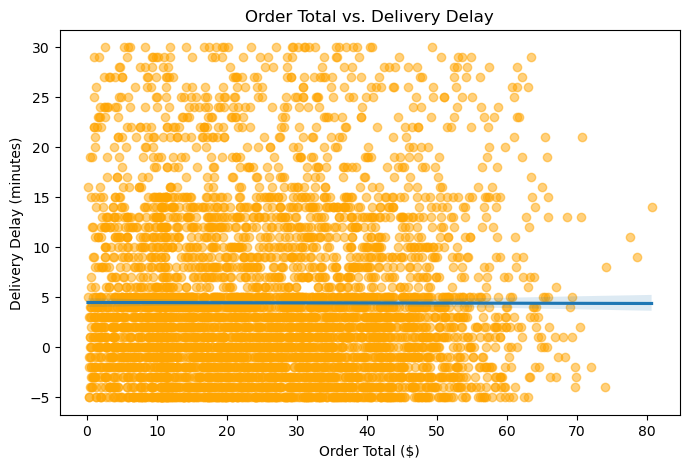

Correlation between order total and delivery delay: -0.00


In [66]:
# scatter plot with regression line to explore possible correlation between order total and delay times
plt.figure(figsize=(8,5))
sns.regplot(x=delivery_df['order_total_usd'], y=delivery_df['delivery_delay'], scatter_kws={'alpha':0.5, 'color':'orange'})
plt.xlabel("Order Total ($)")
plt.ylabel("Delivery Delay (minutes)")
plt.title("Order Total vs. Delivery Delay")
plt.show()

# Correlation coefficient
correlation = delivery_df[['order_total_usd', 'delivery_delay']].corr().iloc[0,1]
print(f"Correlation between order total and delivery delay: {correlation:.2f}")

In [67]:
# calculating rate of on-time deliveries for all stores (little variation)
store_punctuality = delivery_df.groupby('store_id')['delivery_delay'].apply(lambda x: (x <= 0).mean()).sort_values(ascending=False)
print(store_punctuality)

store_id
1       1.0
5172    1.0
5116    1.0
5119    1.0
5121    1.0
       ... 
5323    0.0
5324    0.0
5325    0.0
5326    0.0
9995    0.0
Name: delivery_delay, Length: 5000, dtype: float64


In [70]:
# calculating rate of late deliveries for all stores (little variation)
store_punctuality = delivery_df.groupby('store_id')['delivery_delay'].apply(lambda x: (x > 0).mean()).sort_values(ascending=False)
print(store_punctuality)

store_id
9995    1.0
4826    1.0
4635    1.0
4638    1.0
4639    1.0
       ... 
4864    0.0
4867    0.0
4870    0.0
4877    0.0
4988    0.0
Name: delivery_delay, Length: 5000, dtype: float64


In [72]:
# counting late deliveries per partner and sorting to view partners with the most late deliveries
late_per_partner = delivery_df[delivery_df['delivery_delay'] > 0].groupby('delivery_partner_id').size().sort_values(ascending=False)
print(late_per_partner)

delivery_partner_id
43       1
65328    1
66248    1
66274    1
66328    1
        ..
34338    1
34344    1
34392    1
34427    1
99968    1
Length: 3098, dtype: int64


In [74]:
# no variation in number of late deliveries by partners
late_per_partner.nunique()

1

In [76]:
# calculating average order total for each customer
customer_avg_order = delivery_df.groupby('customer_id')['order_total_usd'].mean()
print(customer_avg_order.describe())

count    2172.000000
mean       26.312350
std        11.986413
min         0.265680
25%        17.921440
50%        26.115380
75%        33.591955
max        73.937760
Name: order_total_usd, dtype: float64


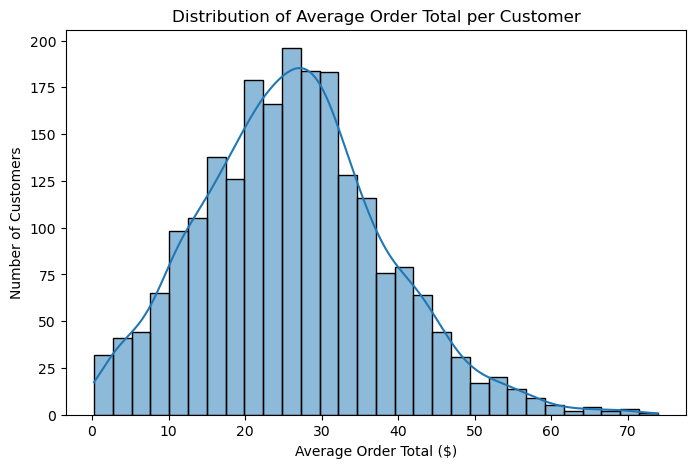

In [78]:
# creating visual of average order total per customer
plt.figure(figsize=(8,5))
sns.histplot(customer_avg_order, bins=30, kde=True)
plt.xlabel("Average Order Total ($)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Average Order Total per Customer")
plt.show()

In [80]:
# calculating the average number or orders placed by each customer
avg_customer_orders = delivery_df['customer_id'].value_counts().mean()
print(customer_orders)

NameError: name 'customer_orders' is not defined

In [ ]:
# calculating which customers have placed the most orders
customer_orders = delivery_df['customer_id'].value_counts().head(40)
print(customer_orders)

In [83]:
# creating visual for top 25 customers by order count
plt.figure(figsize=(10,5))
customer_orders.plot(kind='bar', color='orange')
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.title("Top 25 Customers by Order Count")
plt.show()

NameError: name 'customer_orders' is not defined

<Figure size 1000x500 with 0 Axes>

In [85]:
# calculating frequncy of each payment method used
payment_counts = delivery_df['payment_method'].value_counts()
print(payment_counts)

payment_method
Card      1285
Cash      1257
Wallet    1244
UPI       1214
Name: count, dtype: int64


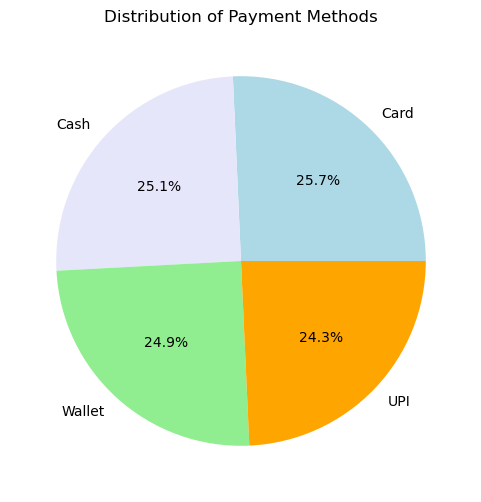

In [87]:
# creating visual for payment methods
plt.figure(figsize=(6,6));
payment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','lavender','lightgreen','orange'])
plt.ylabel("")
plt.title("Distribution of Payment Methods")
plt.show()

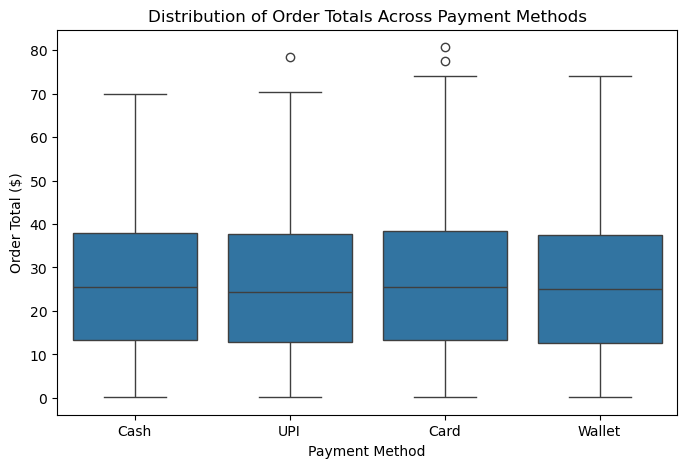

In [89]:
# creating visual to compare order totals across payment methods
plt.figure(figsize=(8,5))
sns.boxplot(x='payment_method', y='order_total_usd', data=delivery_df)
plt.xlabel("Payment Method")
plt.ylabel("Order Total ($)")
plt.title("Distribution of Order Totals Across Payment Methods")
plt.show()

In [91]:
# exploring which stores have recieved the most amount of orders
store_order_counts = delivery_df['store_id'].value_counts().sort_values(ascending=False)
print(store_order_counts)

store_id
4771    1
2463    1
2741    1
3442    1
1318    1
       ..
3458    1
7424    1
6128    1
3078    1
5588    1
Name: count, Length: 5000, dtype: int64


In [93]:
# exploring which partners have delivered the most orders
partner_order_counts = delivery_df['delivery_partner_id'].value_counts()
print(partner_order_counts)

delivery_partner_id
63230    1
53453    1
67163    1
81625    1
48217    1
        ..
13251    1
24901    1
75375    1
63631    1
32851    1
Name: count, Length: 5000, dtype: int64


In [95]:
# no variation in number of deliveries per partner
partner_order_counts.nunique()

1

In [97]:
# calculating average delivery delay by store
store_avg_delay = delivery_df.groupby('store_id')['delivery_delay'].mean() #get average delay for all stores
print(store_avg_delay.describe())

count    5000.000000
mean        4.443000
std         8.063929
min        -5.000000
25%        -1.000000
50%         2.000000
75%         8.000000
max        30.000000
Name: delivery_delay, dtype: float64


In [99]:
# no variation in delivery delay per store as each store only has one order assigned to it
delivery_df['store_id'].nunique()

5000

### File 3: Blinket Units

In [102]:
units_df = pd.read_csv('/Users/tovi/Documents/blinkit_order_items.csv')
units_df

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55
...,...,...,...,...
4995,1669690997,925482,3,475.04
4996,8340761903,124290,2,39.65
4997,5936301790,491314,3,973.44
4998,5710579377,319388,2,657.80


In [104]:
units_df.describe()

,order_id,product_id,quantity,unit_price
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,509974.939600,2.006800,493.157900
std,2.863533e+09,293678.307475,0.820542,298.075647
min,6.046500e+04,4452.000000,1.000000,12.320000
25%,2.531421e+09,257719.000000,1.000000,227.220000
50%,5.074378e+09,540618.000000,2.000000,448.160000
75%,7.488579e+09,747801.000000,3.000000,781.080000
max,9.998298e+09,993331.000000,3.000000,995.980000


In [106]:
units_df.shape

(5000, 4)

In [108]:
units_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


#### Data Cleaning

In [111]:
# checking for duplicates
units_df.duplicated().sum()

0

In [113]:
# checking for null values
null_check = units_df.isnull().sum()
print(null_check)

order_id      0
product_id    0
quantity      0
unit_price    0
dtype: int64


In [115]:
# creating new column that holds total order value
units_df['total_price'] = units_df['quantity'] * units_df['unit_price']
print(units_df.head())  # Display the first few rows to confirm the new column


     order_id  product_id  quantity  unit_price  total_price
0  1961864118      642612         3      517.03      1551.09
1  1549769649      378676         1      881.42       881.42
2  9185164487      741341         2      923.84      1847.68
3  9644738826      561860         1      874.78       874.78
4  5427684290      602241         2      976.55      1953.10


In [117]:
# creating new columns to hold unit price and total price in USD
units_df['unit_price_usd']= units_df['unit_price'] * exchange_rate
units_df['total_price_usd'] = units_df['unit_price_usd'] * units_df['quantity']

units_df.head()

,order_id,product_id,quantity,unit_price,total_price,unit_price_usd,total_price_usd
0,1961864118,642612,3,517.03,1551.09,6.20436,18.61308
1,1549769649,378676,1,881.42,881.42,10.57704,10.57704
2,9185164487,741341,2,923.84,1847.68,11.08608,22.17216
3,9644738826,561860,1,874.78,874.78,10.49736,10.49736
4,5427684290,602241,2,976.55,1953.10,11.71860,23.43720


#### Orders & Products

In [120]:
# calculating most frequently ordered products
top_products = units_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

product_id
51036     70
820973    68
604184    62
34186     61
992178    60
880510    58
673058    56
89084     56
557908    55
123983    55
Name: quantity, dtype: int64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_79683/3400076124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis", order=top_products.index)


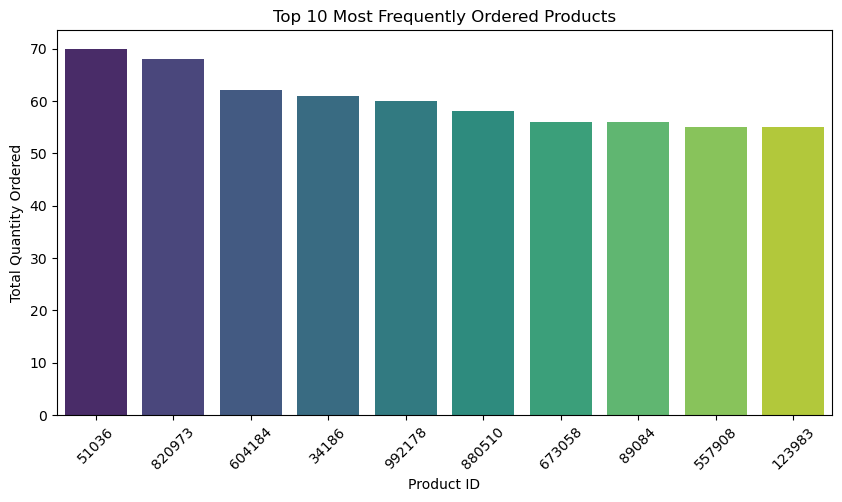

In [122]:
# creating visual for most ordered products
top_products = top_products.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis", order=top_products.index)

plt.xlabel("Product ID")
plt.ylabel("Total Quantity Ordered")
plt.title("Top 10 Most Frequently Ordered Products")
plt.xticks(rotation=45)
plt.show()

In [124]:
# calulating average order value
order_totals = units_df.groupby('order_id')['total_price_usd'].sum()
average_order_value = order_totals.mean()
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $11.93


In [126]:
# order size general stats
print(order_sizes.describe())

NameError: name 'order_sizes' is not defined

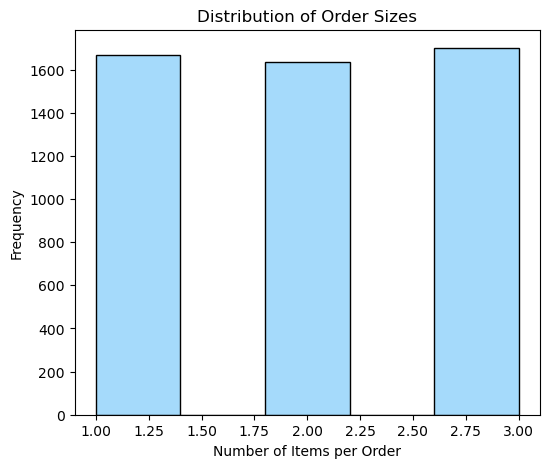

In [128]:
# creating visual for distribution of order values
order_sizes = units_df.groupby('order_id')['quantity'].sum()

plt.figure(figsize=(6,5))
sns.histplot(order_sizes, bins=5, color="lightskyblue")
plt.xlabel("Number of Items per Order")
plt.ylabel("Frequency")
plt.title("Distribution of Order Sizes")
plt.show()

In [130]:
# product generating the most revenue
product_revenue = units_df.groupby('product_id')['total_price_usd'].sum()

max_revenue_prod = product_revenue.idxmax()
max_revenue = max_revenue_prod.max()
print(f'The product ID that generated the most revenue is: {max_revenue}.')

The product ID that generated the most revenue is: 51036.


In [132]:
# top 10 products generating the most revenue
max_product_revenue = units_df.groupby('product_id')['total_price_usd'].sum().sort_values(ascending=False)

print(max_product_revenue.head(10))

product_id
51036     782.55240
34186     677.57580
880510    662.19528
557908    621.96420
264803    621.49152
739534    584.80128
18035     558.10944
883013    546.41376
349294    538.41600
112390    526.78800
Name: total_price_usd, dtype: float64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_79683/914265580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis', order=top_10_products.index)


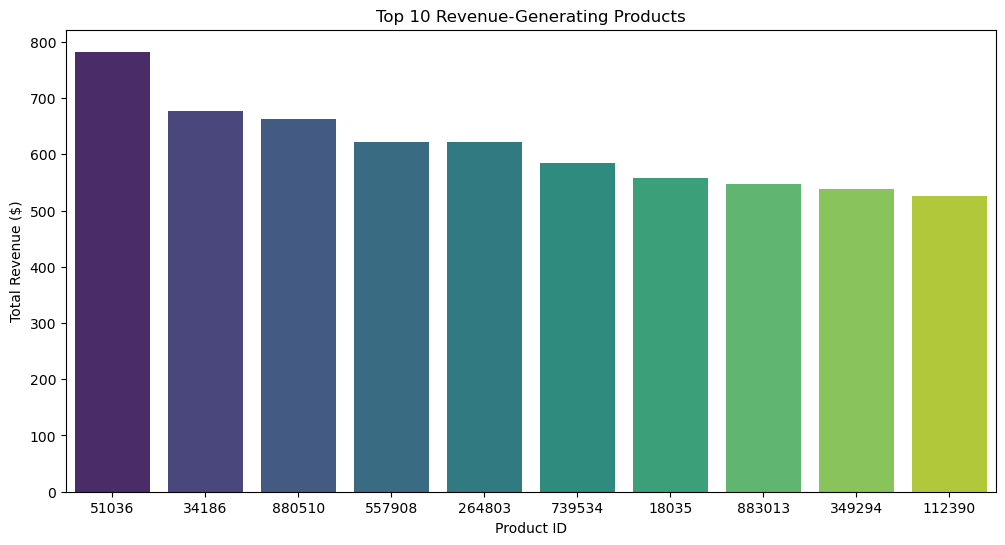

In [134]:
# creating visual for top 10 products generating the most revenue
top_10_products = max_product_revenue.nlargest(10)
top_10_products = top_10_products.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis', order=top_10_products.index)

plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.title('Top 10 Revenue-Generating Products')
plt.show()

In [136]:
# product generating the least revenue
min_revenue_prod = product_revenue.idxmin()
min_revenue = min_revenue_prod.min()
print(f'The product ID that generated the least revenue is: {min_revenue}.')

The product ID that generated the least revenue is: 118820.


In [138]:
# top 10 product generating the least revenue
min_product_revenue = units_df.groupby('product_id')['total_price_usd'].sum().sort_values()
print(min_product_revenue.head(10))

product_id
118820     4.43520
654297     5.72400
962054     6.06960
652118     8.99232
767398     9.03312
300159    11.17620
709916    13.77408
133542    13.97196
473647    15.49800
968887    19.04760
Name: total_price_usd, dtype: float64


/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_79683/1079105023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_products.index, y=bottom_10_products.values, palette='viridis', order=bottom_10_products.index)


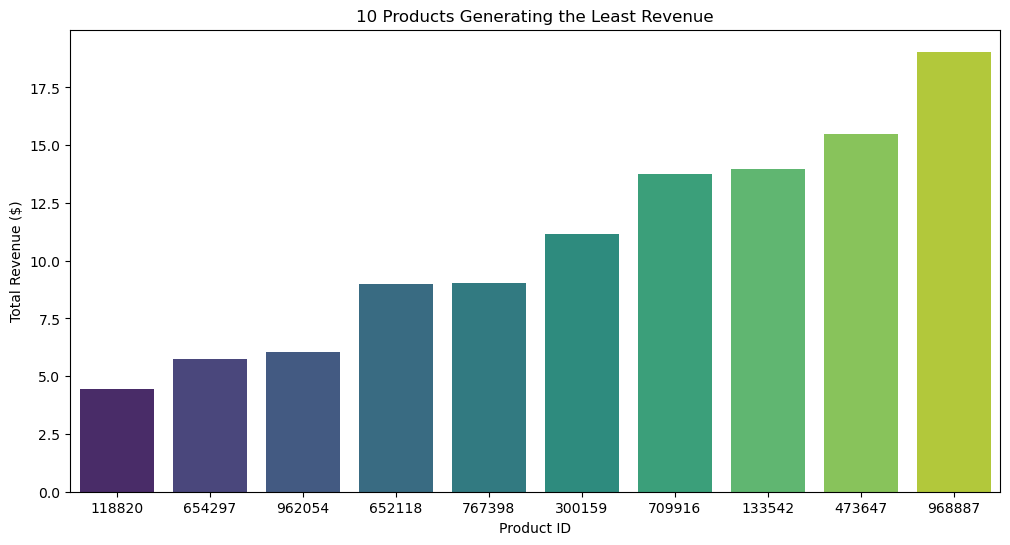

In [140]:
# creating visual for top 10 products generating the least revenue
bottom_10_products = min_product_revenue.nsmallest(10)
bottom_10_products = bottom_10_products.sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_products.index, y=bottom_10_products.values, palette='viridis', order=bottom_10_products.index)

plt.xlabel('Product ID')
plt.ylabel('Total Revenue ($)')
plt.title('10 Products Generating the Least Revenue')
plt.show()

In [142]:
# price distribution general stats
units_df['unit_price_usd'].describe()

count    5000.000000
mean        5.917895
std         3.576908
min         0.147840
25%         2.726640
50%         5.377920
75%         9.372960
max        11.951760
Name: unit_price_usd, dtype: float64

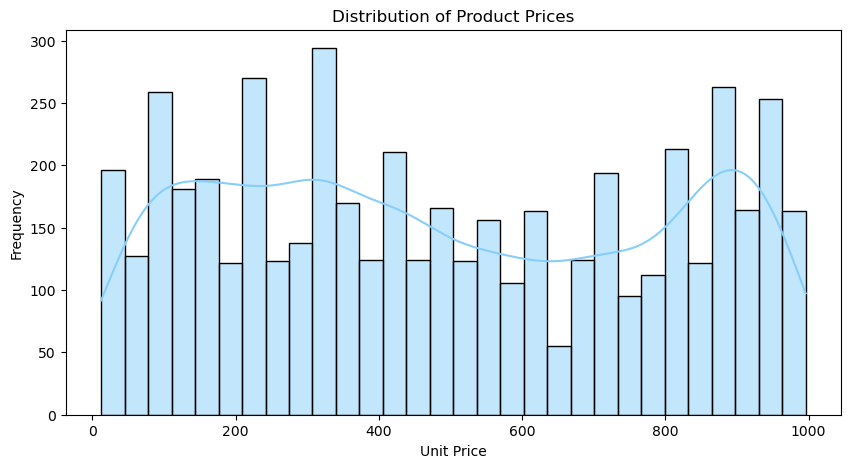

In [144]:
# creating visual for product pricing distrubution
plt.figure(figsize=(10,5))
sns.histplot(units_df['unit_price'], bins=30, kde=True, color='lightskyblue')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()


### File 4: Blinkit Marketing Performance

In [147]:
mkt_df = pd.read_csv('/Users/tovi/Documents/blinkit_marketing_performance.csv')
mkt_df

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22
...,...,...,...,...,...,...,...,...,...,...,...
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.64
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,2.01
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.98
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,2.50


#### Data Cleaning

In [150]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


In [152]:
mkt_df.shape

(5400, 11)

In [154]:
mkt_df.isnull().sum()

campaign_id          0
campaign_name        0
date                 0
target_audience      0
channel              0
impressions          0
clicks               0
conversions          0
spend                0
revenue_generated    0
roas                 0
dtype: int64

In [156]:
mkt_df.duplicated().sum()

0

In [158]:
# creating new column to contain converted spend amounts
mkt_df['spend_usd'] = mkt_df['spend'] * exchange_rate
mkt_df['revenue_generated_usd'] = mkt_df['revenue_generated'] * exchange_rate
mkt_df.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas,spend_usd,revenue_generated_usd
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60,17.18220,57.33300
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98,54.07608,74.85732
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95,54.29076,31.45200
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84,43.47348,35.46000
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22,34.66788,107.42172


#### EDA

# FIX, is this really highest RO

In [162]:
# which campaign has the highest return on ad spend
highest_roas_campaign = mkt_df.loc[mkt_df['roas'].idxmax(), ['campaign_name', 'roas']]
print(highest_roas_campaign)

campaign_name    Email Campaign
roas                        4.0
Name: 97, dtype: object


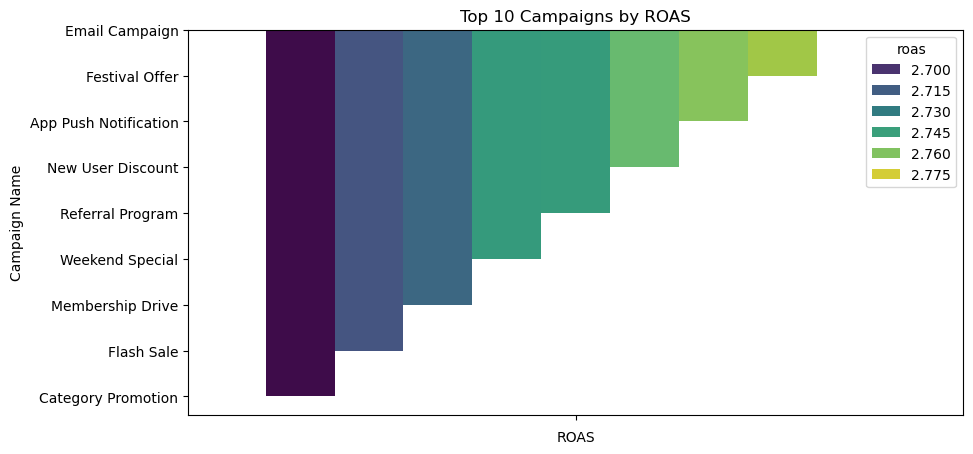

In [164]:
# creating a visual to Identify campaigns with the best ROI
top_campaigns = mkt_df.groupby('campaign_name')['roas'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(y='campaign_name', hue='roas', data=top_campaigns, palette='viridis',)
plt.title("Top 10 Campaigns by ROAS")
plt.xlabel("ROAS")
plt.ylabel("Campaign Name")
plt.show()

In [166]:
# identifying the total spend for each marketing channel
spend_per_channel = mkt_df.groupby('channel')['spend_usd'].sum().sort_values(ascending=False)
print(spend_per_channel)

channel
App             50560.54500
Social Media    49324.36692
SMS             47983.29048
Email           47969.85648
Name: spend_usd, dtype: float64


In [168]:
# which channel has the highest return on ad spend
highest_roas_channel = mkt_df.loc[mkt_df['roas'].idxmax(), ['channel', 'roas', 'campaign_id', 'spend_usd', 'revenue_generated_usd' ]]
print(highest_roas_channel)

channel                  Social Media
roas                              4.0
campaign_id                    664981
spend_usd                    43.19748
revenue_generated_usd        51.74148
Name: 97, dtype: object


In [170]:
# calculating the average roas for each channel
roas_by_channel = mkt_df.groupby('channel')['roas'].mean().sort_values(ascending=False)
print(roas_by_channel)

channel
App             2.754301
Social Media    2.749188
Email           2.748861
SMS             2.710112
Name: roas, dtype: float64


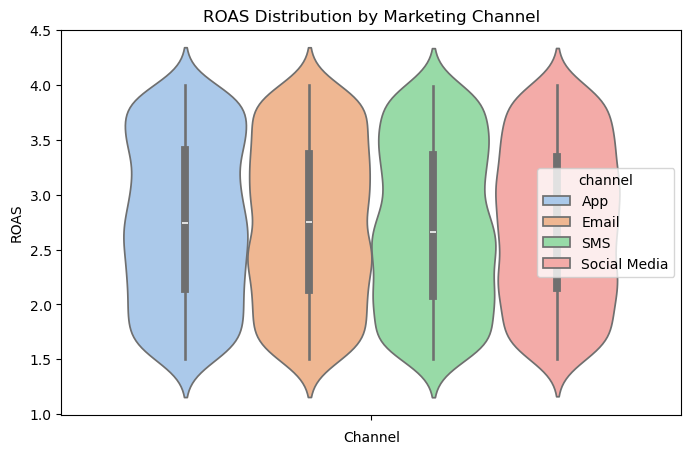

In [172]:
# creating a violin plot shows the distribution and density of ROAS across different channels
plt.figure(figsize=(8, 5))
sns.violinplot(hue='channel', y='roas', data=mkt_df, palette='pastel')
plt.title("ROAS Distribution by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("ROAS")
plt.xticks(rotation=45)
plt.show()

In [174]:
# calculating the average roas across all channels
average_roas = mkt_df['roas'].mean()
print(f"Average ROAS across all channels: {average_roas}")

Average ROAS across all channels: 2.740711111111111


In [176]:
# creating  new column that holds conversion rates
mkt_df['conversion_rate'] = mkt_df['conversions'] / mkt_df['clicks']

# getting the campaign that had the highest conversion rate
highest_conversion_rate_campaign = mkt_df.loc[mkt_df['conversion_rate'].idxmax(), ['campaign_name', 'conversion_rate', 'revenue_generated','channel']]
highest_conversion_rate_campaign

campaign_name        Festival Offer
conversion_rate                0.94
revenue_generated           3074.89
channel                Social Media
Name: 3440, dtype: object

In [178]:
# get average roas by channel
print(mkt_df['conversion_rate'].groupby('channel')['roas'].mean())
#print(roas_by_channel)

KeyError: 'channel'

Track performance fluctuations over time:

In [ ]:
daily_roas = mkt_df.groupby('date')['roas'].mean()

plt.figure(figsize=(15, 6))
daily_roas.plot(title="ROAS Over Time", marker='o', color='orange')
plt.xlabel("Date")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()


In [181]:
# how do these performance metrics correlate to overall roas?
correlation_matrix = mkt_df[['impressions', 'clicks', 'conversions', 'roas']].corr()
print(correlation_matrix)

             impressions    clicks  conversions      roas
impressions     1.000000  0.002873    -0.000508 -0.005031
clicks          0.002873  1.000000    -0.002899 -0.031176
conversions    -0.000508 -0.002899     1.000000 -0.000676
roas           -0.005031 -0.031176    -0.000676  1.000000


In [183]:
# calculating spend per ad channel
spend_by_channel = mkt_df.groupby('channel')['spend_usd'].sum().sort_values(ascending=False)
spend_by_channel

channel
App             50560.54500
Social Media    49324.36692
SMS             47983.29048
Email           47969.85648
Name: spend_usd, dtype: float64

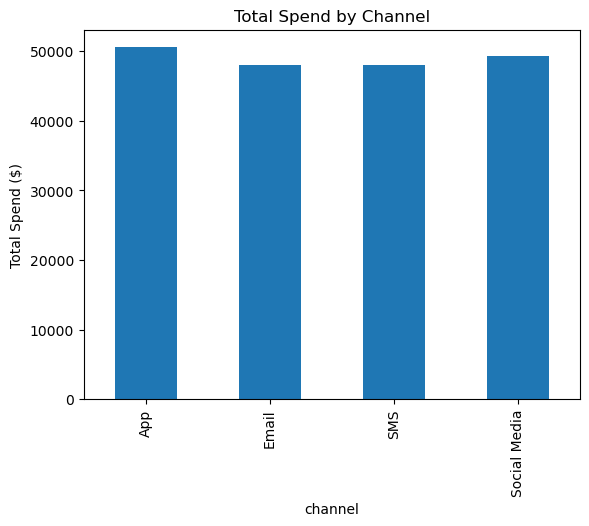

In [185]:
# creating visual to show spend by channel
mkt_df.groupby('channel')['spend_usd'].sum().plot(kind='bar', title='Total Spend by Channel')
plt.ylabel('Total Spend ($)')
plt.show()

In [187]:
# calculating how much is spent per target audience group
audience_spend= mkt_df.groupby('target_audience')['spend_usd'].sum().sort_values(ascending=False)
audience_spend

target_audience
All          49323.69120
New Users    48987.76044
Inactive     48927.31032
Premium      48599.29692
Name: spend_usd, dtype: float64

In [189]:
#audience that generates the most revenue
revenue_by_audience = mkt_df.groupby('target_audience')['revenue_generated_usd'].sum().sort_values(ascending=False)
print(revenue_by_audience)

target_audience
New Users    97709.98656
Inactive     97269.49212
All          95743.65948
Premium      95597.75028
Name: revenue_generated_usd, dtype: float64


In [191]:
#pie chart

In [193]:
# calculating conversion rate by audience group
conversion_rate_by_audience = mkt_df.groupby('target_audience')['conversion_rate'].mean().sort_values(ascending=False)
print(conversion_rate_by_audience)

target_audience
New Users    0.145932
All          0.143187
Inactive     0.140622
Premium      0.138638
Name: conversion_rate, dtype: float64


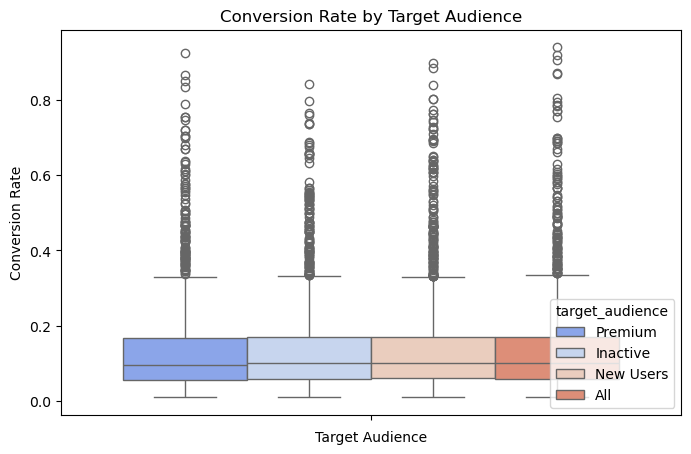

In [195]:
# A box plot shows the spread and outliers in conversion rates for different audience segments:
plt.figure(figsize=(8, 5))
sns.boxplot(hue='target_audience', y='conversion_rate', data=mkt_df, palette='coolwarm')
plt.title("Conversion Rate by Target Audience")
plt.xlabel("Target Audience")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

In [197]:
# which channel has the highest engagement
mkt_df['engagement_rate'] = mkt_df['clicks'] / mkt_df['impressions']
highest_engagement_channel = mkt_df.groupby('channel')['engagement_rate'].mean().sort_values(ascending=False)
print(highest_engagement_channel)

channel
Email           0.148540
SMS             0.142717
Social Media    0.139354
App             0.137087
Name: engagement_rate, dtype: float64


In [199]:
# calculating conversions by day
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].sum().sort_values(ascending=False)
print(conversions_by_day)

day_of_week
Saturday     44829
Thursday     43186
Sunday       42796
Friday       42149
Monday       41933
Wednesday    41657
Tuesday      41488
Name: conversions, dtype: int64


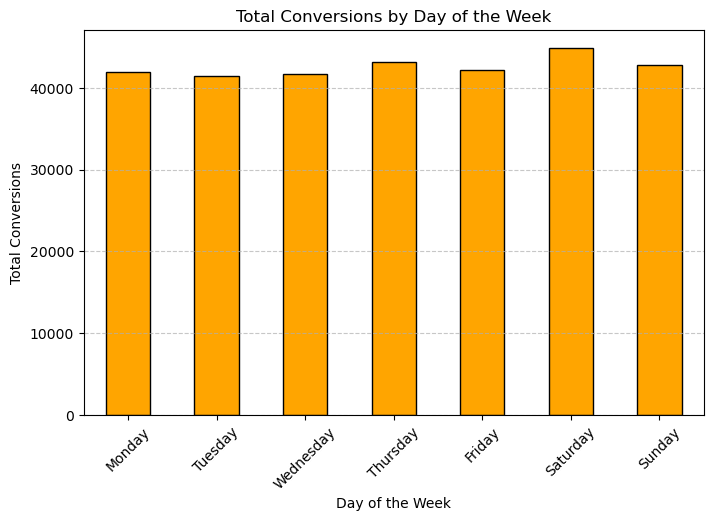

In [201]:
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()
conversions_by_day = mkt_df.groupby('day_of_week')['conversions'].sum()

plt.figure(figsize=(8, 5))
conversions_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Total Conversions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Conversions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [203]:
# calculating engagement rate by day
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

conversions_by_day = mkt_df.groupby('day_of_week')['engagement_rate'].sum().sort_values(ascending=False)
print(conversions_by_day)

day_of_week
Saturday     113.817965
Wednesday    113.264788
Tuesday      109.417170
Sunday       108.944096
Monday       107.874822
Friday       106.890851
Thursday     106.029676
Name: engagement_rate, dtype: float64


In [205]:
# calculating revenue generated by day
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['day_of_week'] = mkt_df['date'].dt.day_name()

conversions_by_day = mkt_df.groupby('day_of_week')['revenue_generated_usd'].sum().sort_values(ascending=False)
print(conversions_by_day)

day_of_week
Monday       56271.27120
Saturday     56051.56332
Friday       55761.44544
Tuesday      54992.15412
Sunday       54566.80824
Thursday     54505.16268
Wednesday    54172.48344
Name: revenue_generated_usd, dtype: float64


In [207]:
performance_by_day = mkt_df.groupby('day_of_week')[['roas', 'conversion_rate']].mean().sort_values(by='roas', ascending=False)
print(performance_by_day)

                 roas  conversion_rate
day_of_week                           
Sunday       2.771305         0.145891
Friday       2.763088         0.146200
Tuesday      2.754819         0.137071
Thursday     2.750954         0.140848
Monday       2.731421         0.142966
Wednesday    2.711255         0.131965
Saturday     2.701912         0.149593


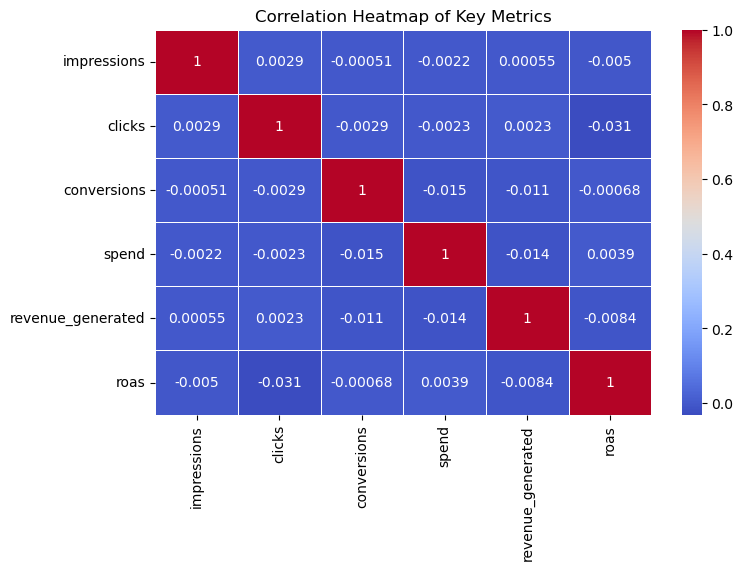

In [209]:
plt.figure(figsize=(8, 5))
sns.heatmap(mkt_df[['impressions', 'clicks', 'conversions', 'spend', 'revenue_generated', 'roas']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()

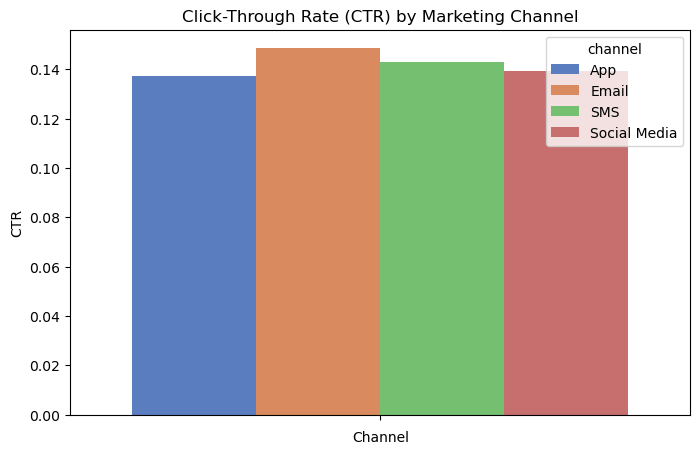

In [211]:
# This helps identify which channel has the highest engagement in terms of clicks per impression:
mkt_df['ctr'] = mkt_df['clicks'] / mkt_df['impressions']  # calculate Click-Through Rate (CTR)

plt.figure(figsize=(8, 5))
sns.barplot(hue='channel', y='ctr', data=mkt_df, palette='muted', errorbar=None)
plt.title("Click-Through Rate (CTR) by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("CTR")
#plt.xticks(rotation=45)
plt.show()

In [213]:
# A heatmap helps identify which target audience and channel combinations yield the best ROAS
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='Blues', linewidths=0.5)
plt.title("ROAS Heatmap by Channel and Target Audience")
plt.xlabel("Marketing Channel")
plt.ylabel("Target Audience")
plt.show()

NameError: name 'pivot' is not defined

<Figure size 800x500 with 0 Axes>

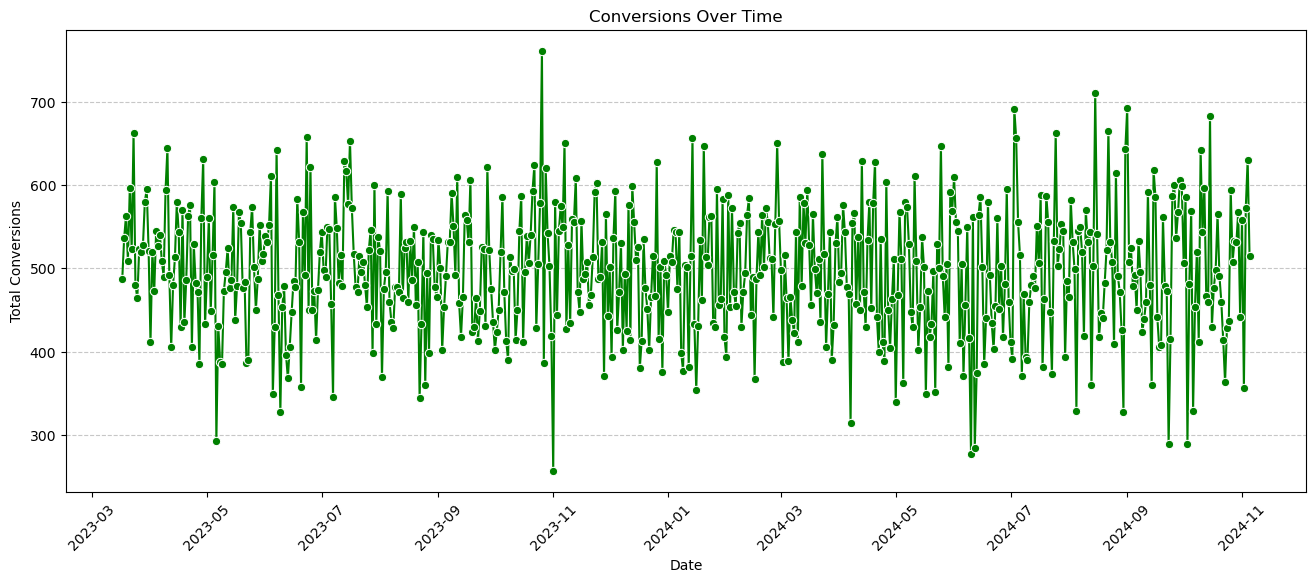

In [215]:
# This shows trends in conversions over time, helping to spot seasonal effects or spikes.
daily_conversions = mkt_df.groupby('date')['conversions'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(x='date', y='conversions', data=daily_conversions, marker='o', color='green')
plt.title("Conversions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Conversions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

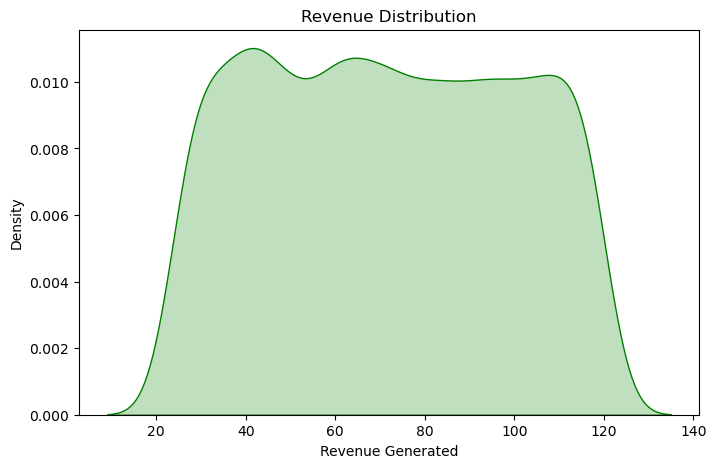

In [217]:
# A kernel density estimate (KDE) plot helps visualize the distribution of revenue:
plt.figure(figsize=(8, 5))
sns.kdeplot(mkt_df['revenue_generated_usd'], fill=True, color='green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue Generated")
plt.ylabel("Density")
plt.show()

Check if high clicks lead to conversions:

In [220]:
correlation = np.corrcoef(mkt_df['clicks'], mkt_df['conversions'])[0, 1]
print(f"Correlation between Clicks and Conversions: {correlation:.2f}")

Correlation between Clicks and Conversions: -0.00


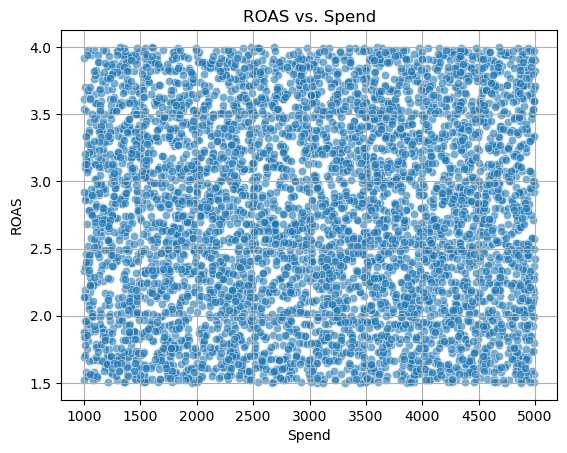

In [223]:
sns.scatterplot(x='spend', y='roas', data=mkt_df, alpha=0.6)
plt.title("ROAS vs. Spend")
plt.xlabel("Spend")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()

Identify drop-off points in the marketing funnel.

In [226]:
mkt_df['impression_to_click'] = mkt_df['clicks'] / mkt_df['impressions']
mkt_df['click_to_conversion'] = mkt_df['conversions'] / mkt_df['clicks']

print(mkt_df[['channel', 'impression_to_click', 'click_to_conversion']].groupby('channel').mean())


              impression_to_click  click_to_conversion
channel                                               
App                      0.137087             0.144894
Email                    0.148540             0.138424
SMS                      0.142717             0.138857
Social Media             0.139354             0.146134


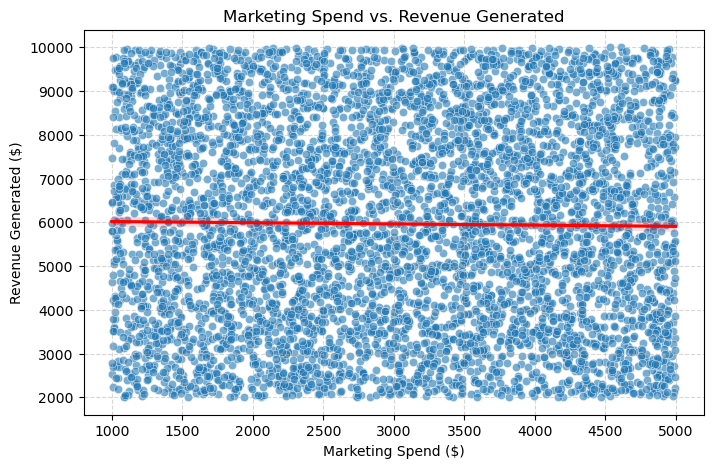

In [228]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='spend', y='revenue_generated', data=mkt_df, alpha=0.6)
sns.regplot(x='spend', y='revenue_generated', data=mkt_df, scatter=False, color='red')
plt.title("Marketing Spend vs. Revenue Generated")
plt.xlabel("Marketing Spend ($)")
plt.ylabel("Revenue Generated ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Which campaigns have the most efficient budget allocation:

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_79683/2859350517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='spend_to_revenue_ratio', data=mkt_df.sort_values(by='spend_to_revenue_ratio'), palette='coolwarm')


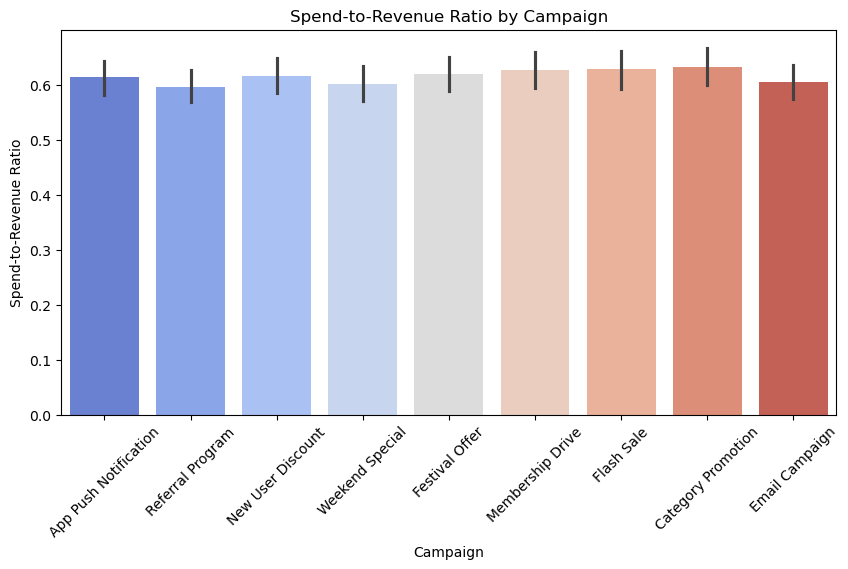

In [231]:
mkt_df['spend_to_revenue_ratio'] = mkt_df['spend'] / mkt_df['revenue_generated']

plt.figure(figsize=(10, 5))
sns.barplot(x='campaign_name', y='spend_to_revenue_ratio', data=mkt_df.sort_values(by='spend_to_revenue_ratio'), palette='coolwarm')
plt.title("Spend-to-Revenue Ratio by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Spend-to-Revenue Ratio")
plt.xticks(rotation=45)
plt.show()

In [233]:
#move this visual up

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_79683/3730438155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel', y='roas', data=mkt_df, palette='pastel')


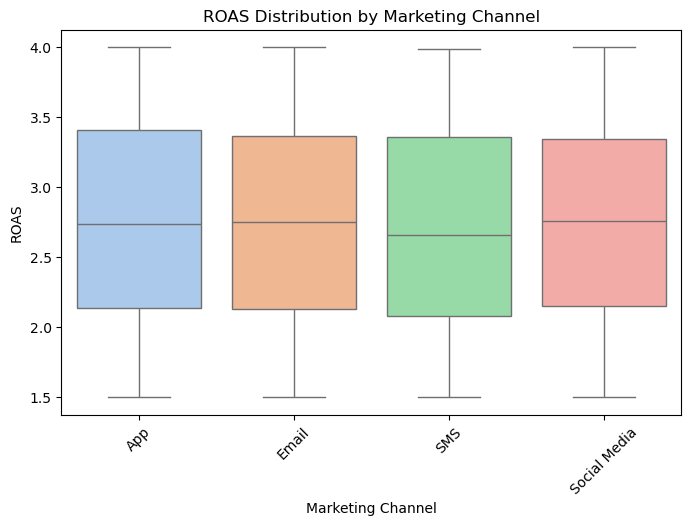

In [235]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='channel', y='roas', data=mkt_df, palette='pastel')
plt.title("ROAS Distribution by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("ROAS")
plt.xticks(rotation=45)
plt.show()

Shows whether higher budget allocation leads to higher conversions:

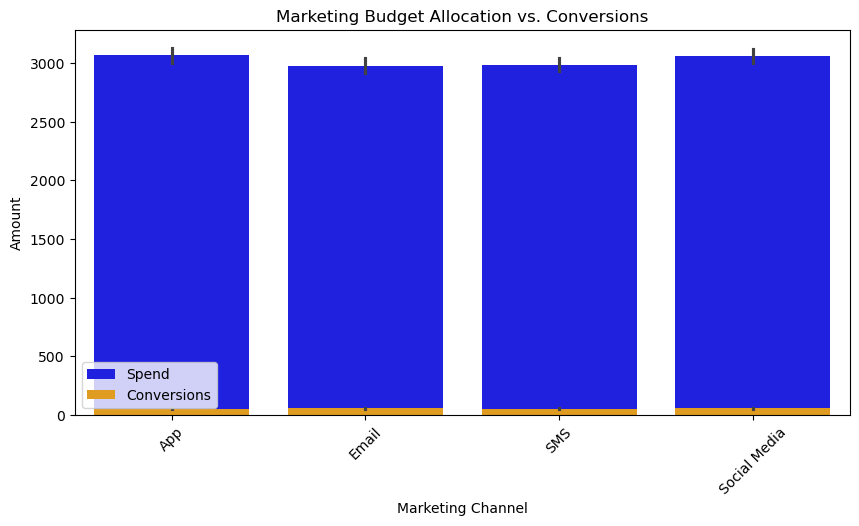

In [238]:
plt.figure(figsize=(10, 5))
sns.barplot(x='channel', y='spend', data=mkt_df, color='blue', label='Spend')
sns.barplot(x='channel', y='conversions', data=mkt_df, color='orange', label='Conversions')
plt.title("Marketing Budget Allocation vs. Conversions")
plt.xlabel("Marketing Channel")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## File 5: Blinkit Inventory- likely to OMIT **NOTE -NEW version, or og version**

In [241]:
df5 = pd.read_csv('/Users/tovi/Documents/blinkit_inventoryNew.csv')
df5

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1
...,...,...,...,...
18100,837480,Nov-24,3,0
18101,56589,Nov-24,3,0
18102,679284,Nov-24,3,0
18103,673058,Nov-24,3,0


In [337]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      18105 non-null  int64 
 1   date            18105 non-null  object
 2   stock_received  18105 non-null  int64 
 3   damaged_stock   18105 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 565.9+ KB


In [339]:
df5.shape

(18105, 4)

In [349]:
df5.isnull()

,product_id,date,stock_received,damaged_stock
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
18100,False,False,False,False
18101,False,False,False,False
18102,False,False,False,False
18103,False,False,False,False


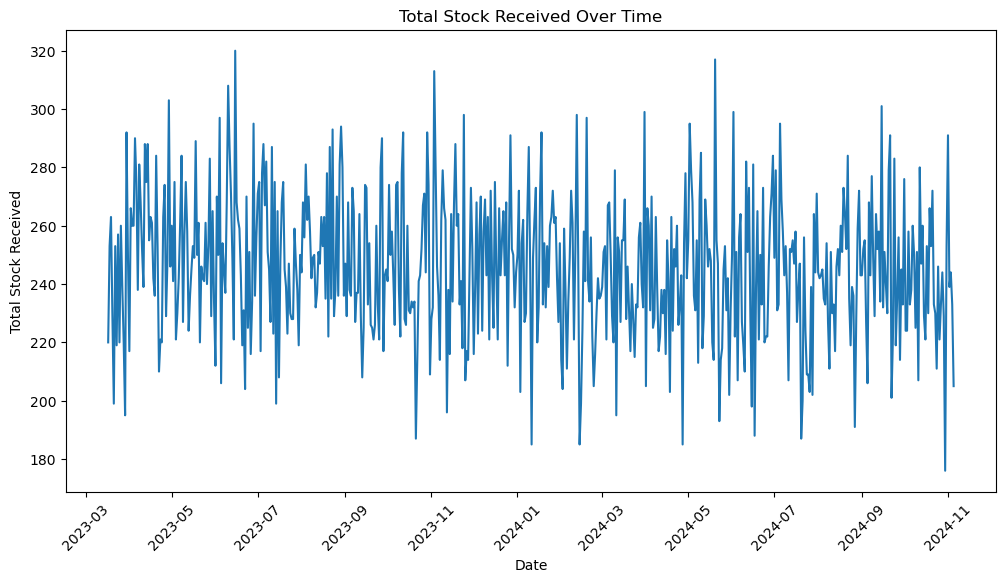

In [351]:
df5['date'] = pd.to_datetime(inventory_df['date'], format="%d-%m-%Y")

# Group by date and sum stock received
daily_stock = inventory_df.groupby('date')['stock_received'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_stock.index, y=daily_stock.values)
plt.xlabel("Date")
plt.ylabel("Total Stock Received")
plt.title("Total Stock Received Over Time")
plt.xticks(rotation=45)
plt.show()

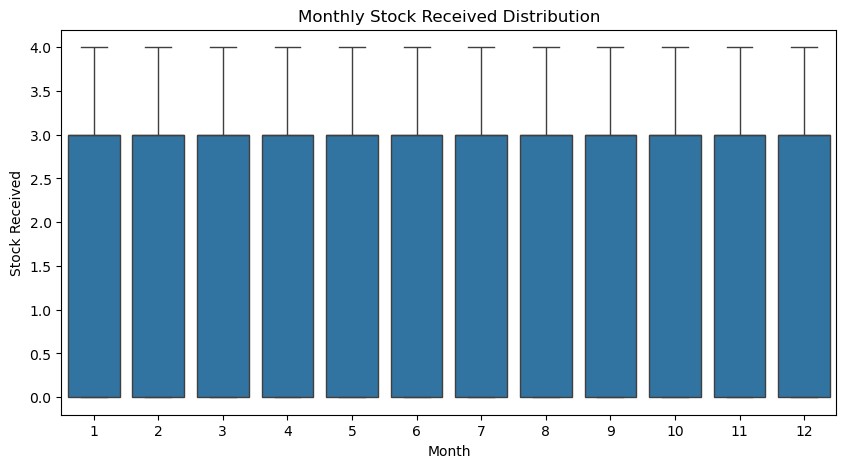

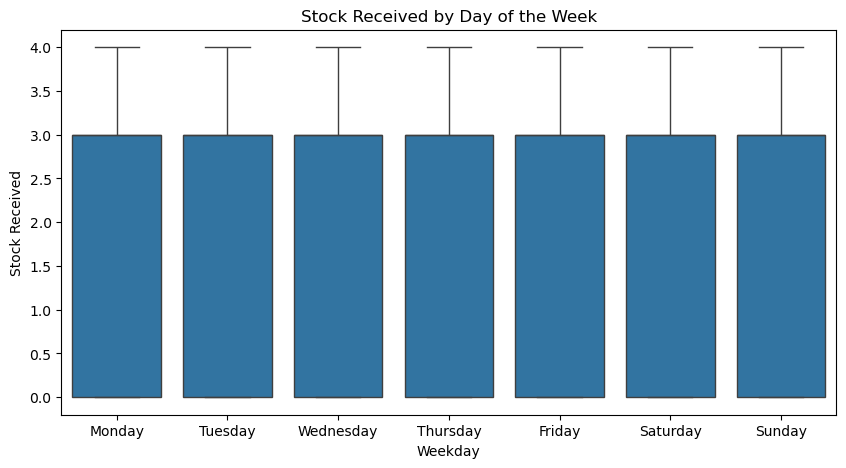

In [353]:
# Extract month and weekday
df5['month'] = df5['date'].dt.month
df5['weekday'] = df5['date'].dt.day_name()

# Monthly trend
plt.figure(figsize=(10, 5))
sns.boxplot(x=inventory_df['month'], y=inventory_df['stock_received'])
plt.xlabel("Month")
plt.ylabel("Stock Received")
plt.title("Monthly Stock Received Distribution")
plt.show()

# Weekly trend
plt.figure(figsize=(10, 5))
sns.boxplot(x=inventory_df['weekday'], y=inventory_df['stock_received'], order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Weekday")
plt.ylabel("Stock Received")
plt.title("Stock Received by Day of the Week")
plt.show()

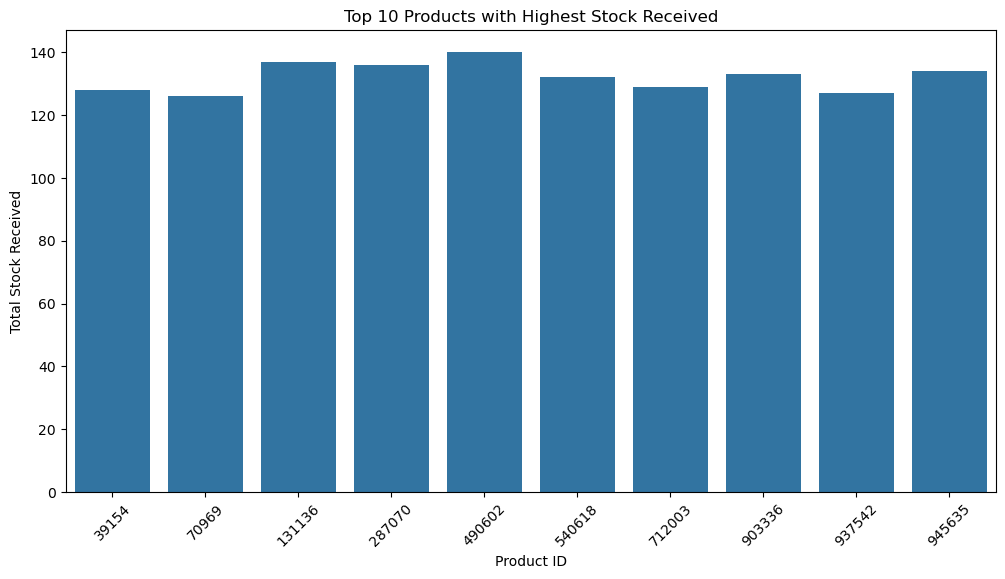

In [355]:
# Total stock received per product
product_stock = df5.groupby('product_id')['stock_received'].sum()

# Top 10 products with highest stock received
top_products = product_stock.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xlabel("Product ID")
plt.ylabel("Total Stock Received")
plt.title("Top 10 Products with Highest Stock Received")
plt.xticks(rotation=45)
plt.show()


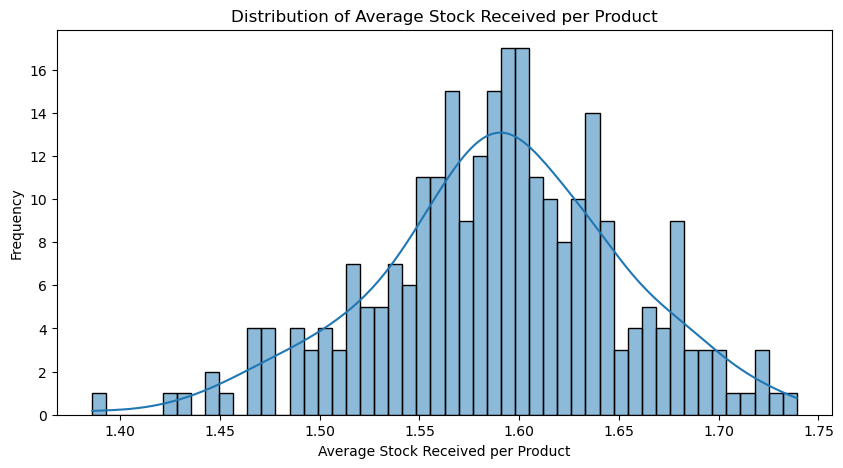

In [357]:
# What is the average stock received per product?

# Calculate mean stock received per product
avg_stock_per_product = df5.groupby('product_id')['stock_received'].mean()

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(avg_stock_per_product, bins=50, kde=True)
plt.xlabel("Average Stock Received per Product")
plt.ylabel("Frequency")
plt.title("Distribution of Average Stock Received per Product")
plt.show()

In [367]:
avg_stock_per_product

product_id
4452      1.600000
6405      1.625000
9436      1.538462
11422     1.647887
14145     1.581081
            ...   
970529    1.646154
990993    1.485714
991434    1.657143
992178    1.541667
993331    1.549296
Name: stock_received, Length: 268, dtype: float64

In [359]:
#What percentage of received stock is damaged on average?

# Calculate total stock and damaged stock
total_stock = df5['stock_received'].sum()
total_damaged = df5['damaged_stock'].sum()

# Calculate percentage
damage_percentage = (total_damaged / total_stock) * 100
print(f"Average percentage of damaged stock: {damage_percentage:.2f}%")

Average percentage of damaged stock: 3.85%


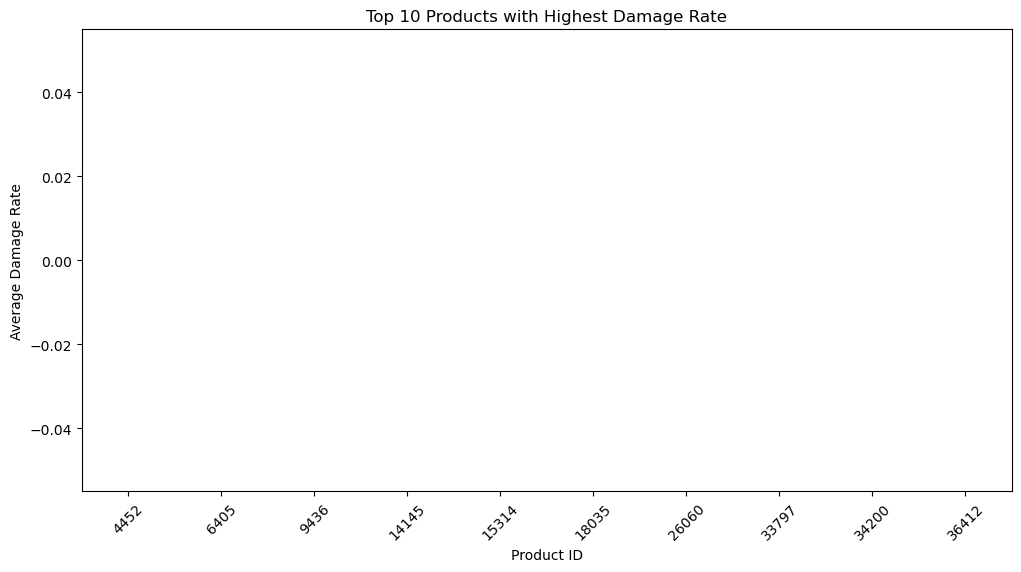

In [361]:
#are there certain products that consistently have higher damage rates?

# Calculate damage rate per product
df5['damage_rate'] = df5['damaged_stock'] / inventory_df['stock_received']
product_damage = df5.groupby('product_id')['damage_rate'].mean()

# Top 10 products with highest damage rate
top_damaged_products = product_damage.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_damaged_products.index, y=top_damaged_products.values)
plt.xlabel("Product ID")
plt.ylabel("Average Damage Rate")
plt.title("Top 10 Products with Highest Damage Rate")
plt.xticks(rotation=45)
plt.show()


In [363]:
df5['damage_rate'].nlargest(10)

9       inf
23      inf
25      inf
28      inf
30      inf
49      inf
53      inf
54      inf
61      inf
1806    inf
Name: damage_rate, dtype: float64

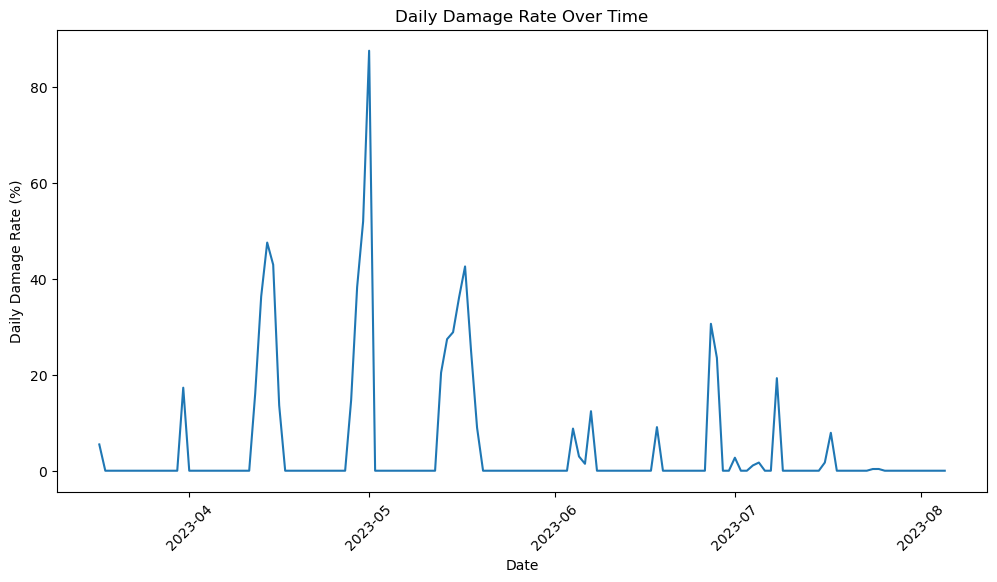

In [365]:
# how does damage rate change over time

# Calculate daily damage rate
daily_damage_rate = (df5.groupby('date')['damaged_stock'].sum() /
                     df5.groupby('date')['stock_received'].sum()) * 100

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_damage_rate.index, y=daily_damage_rate.values)
plt.xlabel("Date")
plt.ylabel("Daily Damage Rate (%)")
plt.title("Daily Damage Rate Over Time")
plt.xticks(rotation=45)
plt.show()

### File 7: Blinkit Delivery Times: **NOTE maybe to be excluded- order_df shows delivery times and stats, only one unique value for reasons_if_delayed which is traffic.**

In [269]:
df7 = pd.read_csv('/Users/tovi/Documents/blinkit_delivery_performance.csv')
df7

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic
...,...,...,...,...,...,...,...,...
4995,1669690997,90914,2023-12-25 16:05:20,2023-12-25 16:10:20,5.0,1.86,On Time,Traffic
4996,8340761903,27952,2023-11-27 09:38:43,2023-11-27 09:36:43,-2.0,3.31,On Time,NaN
4997,5936301790,9590,2024-06-21 19:23:09,2024-06-21 19:26:09,3.0,2.44,On Time,Traffic
4998,5710579377,29940,2024-06-06 15:12:13,2024-06-06 15:10:13,-2.0,1.76,On Time,NaN


In [271]:
df7['reasons_if_delayed'].nunique()

1

### File 8: Blinkit Customers

In [274]:
cust_df = pd.read_csv('/Users/tovi/Documents/blinkit_customers.csv')
cust_df

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14
...,...,...,...,...,...,...,...,...,...,...,...
2495,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33
2496,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81
2497,71688530,Umang Dash,gokhalenicholas@example.org,917595275963,"151, Parmer Ganj\nLoni 906431",Kavali,528749,2024-03-18,Regular,1,1541.22
2498,89051578,Zinal Natarajan,vyasfrado@example.com,911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.50


In [276]:
#only keep desired columns
columns=['customer_id', 'area', 'registration_date', 'customer_segment', 'total_orders', 'avg_order_value']


In [278]:
# Convert registration_date to datetime
cust_df['registration_date'] = pd.to_datetime(cust_df['registration_date'])

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_79683/4214343589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cust_df['customer_segment'], palette='viridis')


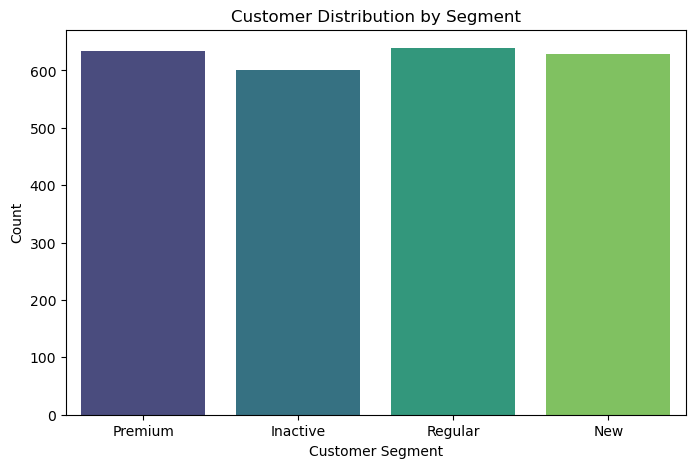

In [280]:
# 1. Distribution of customers across different segments
plt.figure(figsize=(8, 5))
sns.countplot(x=cust_df['customer_segment'], palette='viridis')
plt.title("Customer Distribution by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.show()

In [282]:
# 2. Average total orders per customer segment
avg_orders = cust_df.groupby('customer_segment')['total_orders'].mean().sort_values()
print("Average Total Orders per Customer Segment:\n", avg_orders)


Average Total Orders per Customer Segment:
 customer_segment
Premium     10.192733
Regular     10.325509
Inactive    10.583333
New         10.874204
Name: total_orders, dtype: float64


In [284]:
# 3. Average order value across customer segments
avg_order_value = cust_df.groupby('customer_segment')['avg_order_value'].mean()
print("Average Order Value per Customer Segment:\n", avg_order_value)

Average Order Value per Customer Segment:
 customer_segment
Inactive    1102.150000
New         1116.635557
Premium     1101.473965
Regular     1089.467042
Name: avg_order_value, dtype: float64


In [286]:
# 4. Percentage of customers with fewer than 5 orders
low_order_percentage = (cust_df[cust_df['total_orders'] < 5].shape[0] / cust_df.shape[0]) * 100
print(f"Percentage of customers with fewer than 5 orders: {low_order_percentage:.2f}%")

Percentage of customers with fewer than 5 orders: 19.96%


In [288]:
# 5. Total revenue generated by each customer segment
cust_df['total_revenue'] = cust_df['total_orders'] * cust_df['avg_order_value']
total_revenue = cust_df.groupby('customer_segment')['total_revenue'].sum()
print("Total Revenue by Customer Segment:\n", total_revenue)

Total Revenue by Customer Segment:
 customer_segment
Inactive    7107041.74
New         7679432.62
Premium     7081961.18
Regular     7158658.67
Name: total_revenue, dtype: float64


Correlation between Total Orders and Average Order Value:
                  total_orders  avg_order_value
total_orders         1.000000         0.014875
avg_order_value      0.014875         1.000000


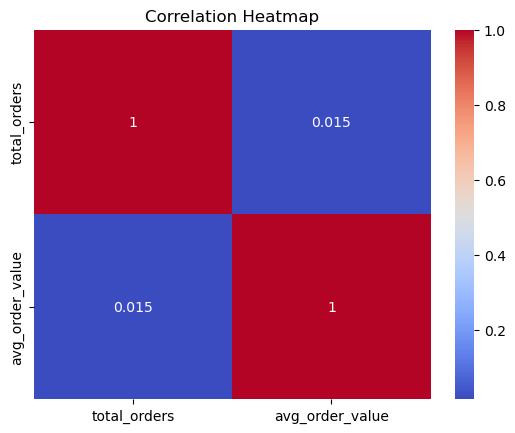

In [290]:
# 6. Correlation between total orders and average order value
correlation = cust_df[['total_orders', 'avg_order_value']].corr()
print("Correlation between Total Orders and Average Order Value:\n", correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [292]:
# 7. Highest and lowest average order values
max_order_value = cust_df['avg_order_value'].max()
min_order_value = cust_df['avg_order_value'].min()
print(f"Highest Average Order Value: {max_order_value}")
print(f"Lowest Average Order Value: {min_order_value}")


Highest Average Order Value: 1999.83
Lowest Average Order Value: 200.43


In [294]:
# 8. Area with the highest number of registered customers
top_area = cust_df['area'].value_counts().idxmax()
print(f"Area with the most customers: {top_area}")

Area with the most customers: Jalna


In [296]:
# 8. Area with the lowest number of registered customers
top_area = cust_df['area'].value_counts().idxmin()
print(f"Area with the fewest customers: {top_area}")

Area with the fewest customers: Mangalore


In [298]:
# 9. Average order value per area
area_avg_order_value = cust_df.groupby('area')['avg_order_value'].mean()
print("Average Order Value per Area:\n", area_avg_order_value)

Average Order Value per Area:
 area
Adoni             796.457778
Agartala          919.827500
Agra             1216.622000
Ahmedabad         929.483333
Ahmednagar        777.356667
                    ...     
Vijayanagaram     896.838000
Vijayawada       1272.813750
Visakhapatnam    1102.930909
Warangal         1057.992222
Yamunanagar      1112.492000
Name: avg_order_value, Length: 316, dtype: float64


## get max of this value as well

In [301]:
# 10. Areas with the highest percentage of Premium customers
premium_distribution = cust_df[cust_df['customer_segment'] == 'Premium']['area'].value_counts()
print("Areas with highest Premium customer count:\n", premium_distribution.head())

Areas with highest Premium customer count:
 area
Kota         7
Orai         6
Burhanpur    6
Etawah       6
Purnia       6
Name: count, dtype: int64


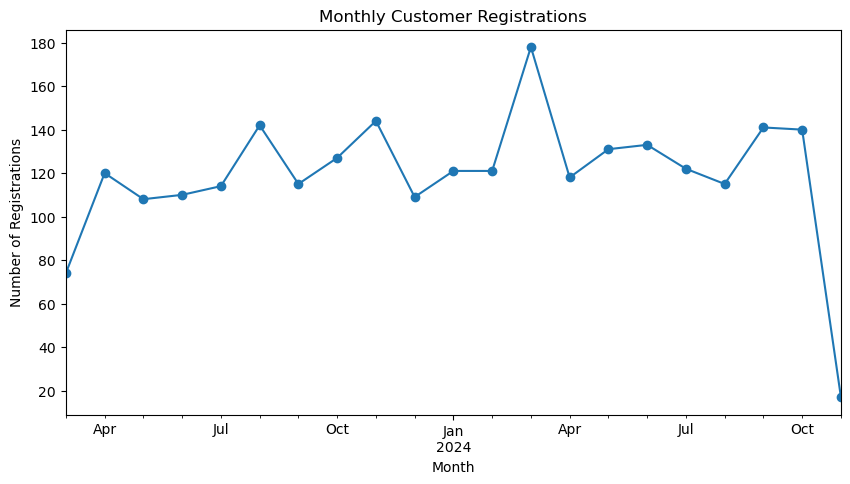

In [303]:
# 11. Monthly customer registrations
cust_df['registration_month'] = cust_df['registration_date'].dt.to_period("M")
monthly_registrations = cust_df['registration_month'].value_counts().sort_index()
monthly_registrations.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Monthly Customer Registrations")
plt.xlabel("Month")
plt.ylabel("Number of Registrations")
plt.show()

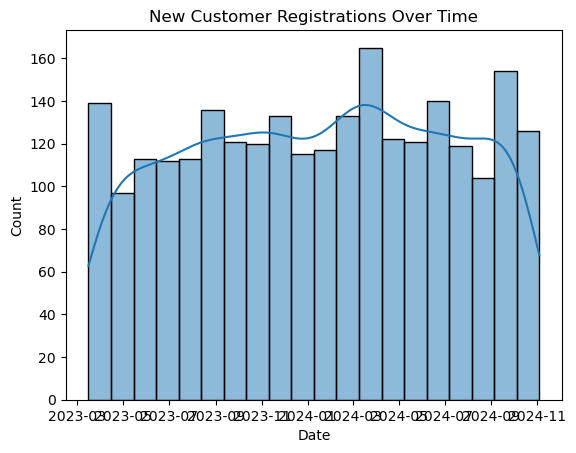

In [305]:
# 12. Trend of new customer registrations over time
sns.histplot(cust_df['registration_date'], bins=20, kde=True)
plt.title("New Customer Registrations Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_79683/1404655137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)


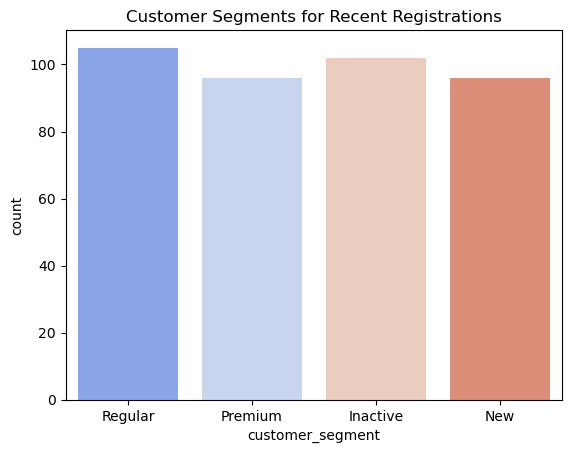

In [307]:
# 13. Recent customer segment distribution (last 3 months)
recent_customers = cust_df[cust_df['registration_date'] >= cust_df['registration_date'].max() - pd.DateOffset(months=3)]
sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)
plt.title("Customer Segments for Recent Registrations")
plt.show()

/var/folders/yz/1gr6swr5703b66sbw24282z40000gn/T/ipykernel_79683/2483830825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)


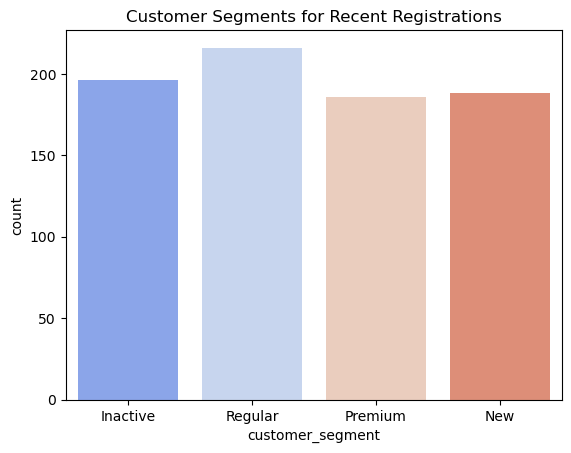

In [309]:
# 13. Recent customer segment distribution (last 6 months)
recent_customers = cust_df[cust_df['registration_date'] >= cust_df['registration_date'].max() - pd.DateOffset(months=6)]
sns.countplot(x=recent_customers['customer_segment'], palette='coolwarm', legend=False)
plt.title("Customer Segments for Recent Registrations")
plt.show()

### File 9: Blinkit Customer Feedback

In [315]:
feedback_df = pd.read_csv('/Users/tovi/Documents/blinkit_customer_feedback.csv')
feedback_df

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
...,...,...,...,...,...,...,...,...
4995,9024060,1669690997,62600289,3,Taste was not as expected.,Product Quality,Negative,2023-12-25
4996,4715968,8340761903,53640286,3,"Average experience, could improve.",Product Quality,Neutral,2023-11-27
4997,9621021,5936301790,87059497,4,"Average experience, could improve.",App Experience,Neutral,2024-06-21
4998,1134095,5710579377,67310893,4,"Average experience, could improve.",Delivery,Neutral,2024-06-06


Overall Rating Distribution:

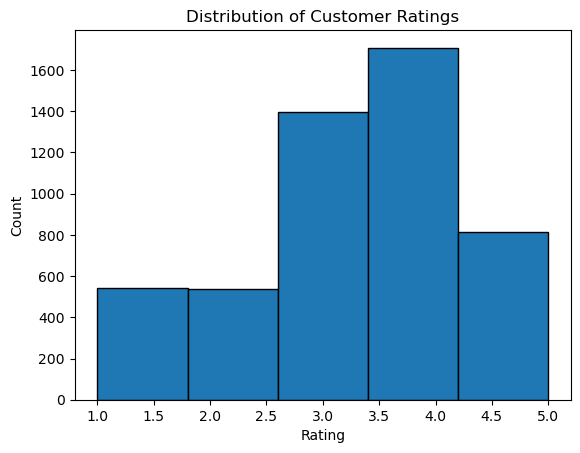

In [318]:
feedback_df['rating'].plot(kind='hist', bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Customer Ratings')
plt.show()

Sentiment Distribution

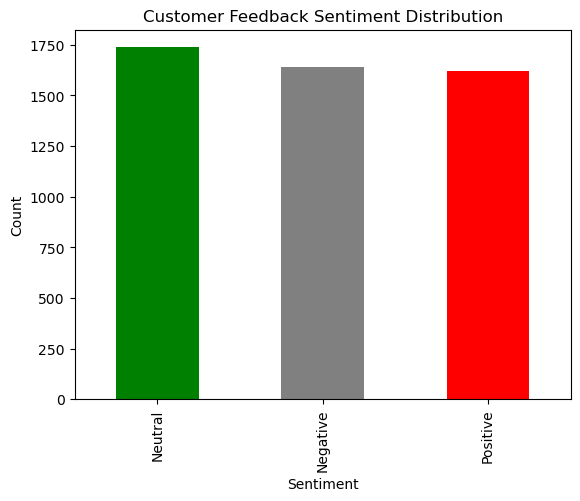

In [321]:
# Count occurrences of each sentiment
sentiment_counts = feedback_df['sentiment'].value_counts()

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Customer Feedback Sentiment Distribution')
plt.show()

Average Rating per Feedback Category:

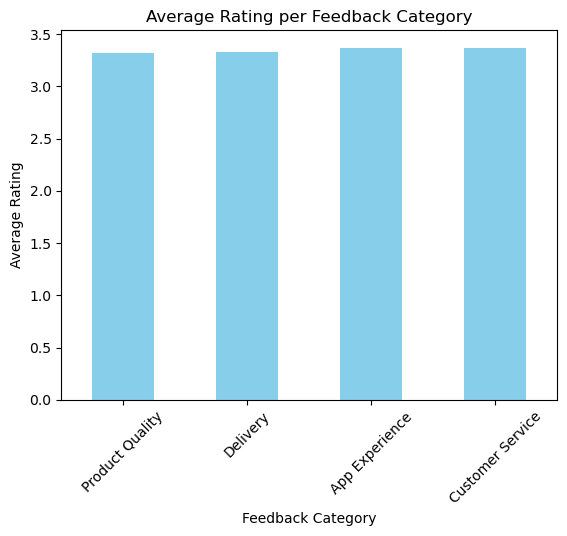

In [324]:
category_avg_rating = feedback_df.groupby('feedback_category')['rating'].mean().sort_values()

# Plot category vs. average rating
category_avg_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Feedback Category')
plt.ylabel('Average Rating')
plt.title('Average Rating per Feedback Category')
plt.xticks(rotation=45)
plt.show()

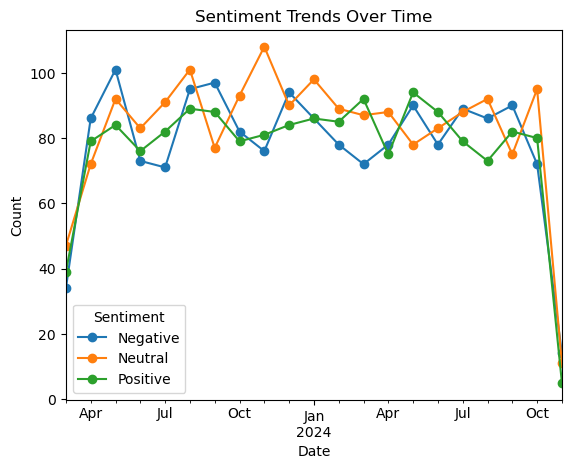

In [327]:
feedback_df['feedback_date'] = pd.to_datetime(feedback_df['feedback_date'])

# Count sentiment over time
sentiment_trend = feedback_df.groupby(feedback_df['feedback_date'].dt.to_period('M'))['sentiment'].value_counts().unstack()

# Plot sentiment trend
sentiment_trend.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Trends Over Time')
plt.legend(title='Sentiment')
plt.show()

In [330]:
from collections import Counter
import re

# Combine all negative feedback
negative_feedback = ' '.join(feedback_df[feedback_df['sentiment'] == 'Negative']['feedback_text'])

# Tokenize and count words
words = re.findall(r'\b\w+\b', negative_feedback.lower())
word_counts = Counter(words)

# Get 10 most common words
common_words = word_counts.most_common(20)
print(common_words)

[('was', 1158), ('the', 651), ('i', 526), ('not', 479), ('delivery', 360), ('order', 324), ('late', 182), ('and', 182), ('unhappy', 182), ('product', 178), ('damaged', 178), ('during', 178), ('worth', 175), ('price', 175), ('paid', 175), ('had', 169), ('a', 169), ('bad', 169), ('experience', 169), ('incorrect', 166)]


**TO DO**
- create separate doc for analysis w SQL documentation
- upload CSVs to pgadmin
- select files for PYTHON EDA, NOT SQL, reduce it, upload, view, and choose- explain in beginning why certain python files were left out of the python analysis
- should anything be combined?
- choose top 2-3 files for matplot and numpy demo
- Tableau dashboard

## Exploratory 